In [2]:

! pip install opendatasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import opendatasets as od
import tensorflow as tf

In [3]:
od.download("https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: chathushkajeewantha
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification


100%|██████████| 217M/217M [00:02<00:00, 101MB/s]

In [4]:
BATCH_SIZE=32
IMAGE_SIZE=(128,128)

In [5]:
train_data_dir="/content/cats-and-dogs-for-classification/cats_dogs/train"
test_data_dir="/content/cats-and-dogs-for-classification/cats_dogs/test"


In [6]:
train_data=tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                       image_size=IMAGE_SIZE,
                                                       batch_size=BATCH_SIZE,
                                                       subset='training',
                                                       validation_split=0.2,
                                                       seed=42)


validation_data=tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                       image_size=IMAGE_SIZE,
                                                       batch_size=BATCH_SIZE,
                                                       subset='validation',
                                                       validation_split=0.1,
                                                       seed=42)


test_data=tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                       image_size=IMAGE_SIZE,
                                                       batch_size=BATCH_SIZE)

Found 8000 files belonging to 2 classes.
Using 6400 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.
Found 2000 files belonging to 2 classes.


In [7]:
class_names=train_data.class_names
class_names

['cats', 'dogs']

In [8]:
for image_batch,label_batch in train_data.take(1):
  print(image_batch.shape)
  print(label_batch.shape)


(32, 128, 128, 3)
(32,)


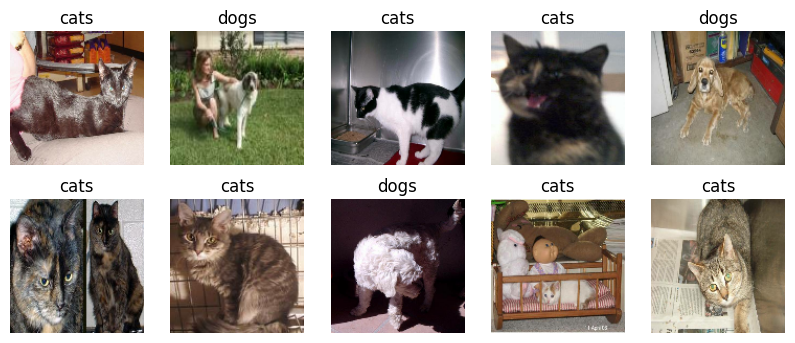

In [9]:

plt.figure(figsize=(10,4))
for image,label in train_data.take(1):
  for i in range(10):
    ax=plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(class_names[label[i]])
    plt.axis("off")

In [10]:

for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[101.00769   104.00769   109.00769  ]
   [111.074585  112.71521   114.30505  ]
   [117.635284  115.31354   112.59396  ]
   ...
   [129.86246   132.91324   136.22964  ]
   [126.8725    133.10297   135.69281  ]
   [128.9002    138.99207   139.94614  ]]

  [[ 85.20029    88.20029    93.20029  ]
   [ 99.3725     99.79227   101.78906  ]
   [114.00287   112.997925  110.048706 ]
   ...
   [116.720825  120.720825  123.720825 ]
   [119.9389    126.16937   128.75922  ]
   [138.79547   147.0824    148.93893  ]]

  [[ 92.54297    94.90234    99.58203  ]
   [ 91.57605    91.986206   93.986206 ]
   [105.38388   104.38388   101.75107  ]
   ...
   [120.73743   125.52237   128.52237  ]
   [130.21445   135.21445   138.21445  ]
   [127.32648   134.36554   136.68585  ]]

  ...

  [[118.07504   122.07504   125.07504  ]
   [121.617584  125.617584  128.61758  ]
   [130.54602   134.54602   137.54602  ]
   ...
   [ 81.51825    87.02301    96.76108  ]
   [ 45.951294   50.819916   54.147003 ]
   [ 

In [11]:
train_data=train_data.map(lambda x,y:(x/255,y))
validation_data=validation_data.map(lambda x,y:(x/255,y))
test_data=test_data.map(lambda x,y:(x/255,y))

In [12]:


for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[0.15117954 0.08451287 0.12372855]
   [0.1564951  0.08982843 0.12904412]
   [0.14387254 0.07720588 0.11642157]
   ...
   [0.         0.00392157 0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.15078124 0.08411458 0.12333027]
   [0.1463848  0.07971814 0.11893383]
   [0.13852635 0.07185968 0.11107536]
   ...
   [0.         0.         0.        ]
   [0.         0.00127145 0.        ]
   [0.         0.         0.        ]]

  [[0.15681386 0.09014719 0.12936288]
   [0.15010071 0.08343404 0.12264973]
   [0.1491728  0.08250613 0.12172181]
   ...
   [0.00392157 0.         0.        ]
   [0.         0.00392157 0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.7237403  0.6738876  0.726761  ]
   [0.7528033  0.7035823  0.75956535]
   [0.77319306 0.71951526 0.7698836 ]
   ...
   [0.04705882 0.00392157 0.03529412]
   [0.05098039 0.         0.03529412]
   [0.0395804  0.         0.03137255]]

  [[0.7596398  0.66668636 0.694030

In [13]:


data_augmentation=tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal",input_shape=(128,128,3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model=tf.keras.models.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32,kernel_size=3,activation="relu"))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64,kernel_size=3,activation="relu"))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128,kernel_size=3,activation="relu"))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dense(32,activation="relu"))

model.add(tf.keras.layers.Dense(1,activation="sigmoid"))

In [15]:
model.summary


<bound method Model.summary of <Sequential name=sequential_1, built=True>>

In [16]:

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=["accuracy"])

In [17]:

history=model.fit(train_data,
                  epochs=20,
                  validation_data=validation_data)

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.5619 - loss: 0.6910 - val_accuracy: 0.5050 - val_loss: 0.6967
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.6267 - loss: 0.6422 - val_accuracy: 0.5288 - val_loss: 0.6955
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6337 - loss: 0.6321 - val_accuracy: 0.6975 - val_loss: 0.5920
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.6604 - loss: 0.6040 - val_accuracy: 0.6925 - val_loss: 0.5615
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.6755 - loss: 0.5914 - val_accuracy: 0.5238 - val_loss: 1.0244
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.6813 - loss: 0.5835 - val_accuracy: 0.7412 - val_loss: 0.5248
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.7054 - loss: 0.5646 - val_accuracy: 0.7350 - val_loss: 0.5269
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - accuracy: 0.7075 - loss: 0.5651 - val

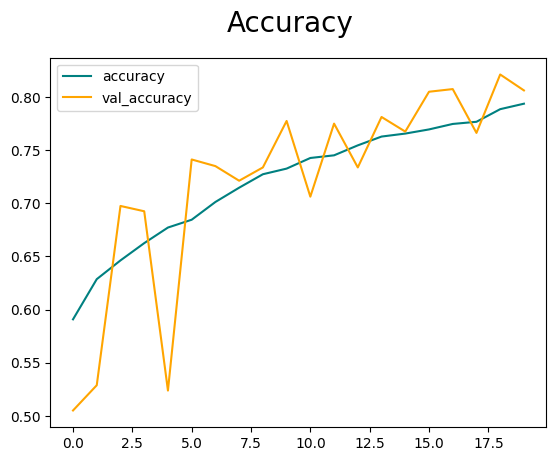

In [18]:

fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()

In [19]:
history.history

{'accuracy': [0.5907812714576721,
  0.6285937428474426,
  0.6462500095367432,
  0.6625000238418579,
  0.6771875023841858,
  0.6845312714576721,
  0.7012500166893005,
  0.7146875262260437,
  0.727343738079071,
  0.7326562404632568,
  0.7426562309265137,
  0.7451562285423279,
  0.7545312643051147,
  0.7628124952316284,
  0.765625,
  0.76953125,
  0.7746875286102295,
  0.7767187356948853,
  0.7885937690734863,
  0.793749988079071],
 'loss': [0.6695181131362915,
  0.6470729112625122,
  0.6223710775375366,
  0.6042919754981995,
  0.5919091701507568,
  0.5818352103233337,
  0.5695697665214539,
  0.5607156157493591,
  0.5386898517608643,
  0.5273411273956299,
  0.5211667418479919,
  0.5103137493133545,
  0.5017436742782593,
  0.4879680275917053,
  0.48979347944259644,
  0.4742378294467926,
  0.4650891423225403,
  0.46580952405929565,
  0.4522484838962555,
  0.43729403614997864],
 'val_accuracy': [0.5049999952316284,
  0.5287500023841858,
  0.6974999904632568,
  0.6924999952316284,
  0.5237500

In [20]:
precision=tf.keras.metrics.Precision()
recall=tf.keras.metrics.Recall()
accuracy=tf.keras.metrics.BinaryAccuracy()

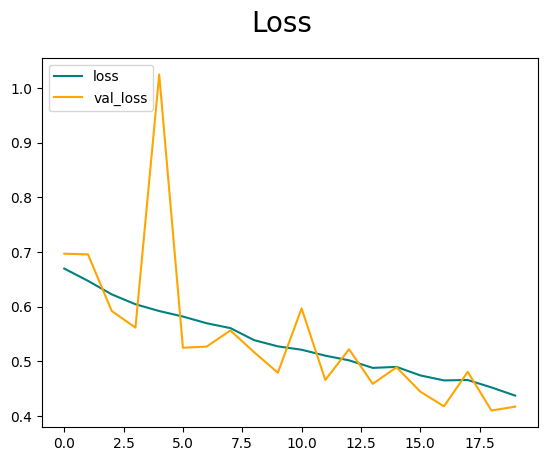

In [21]:

fig=plt.figure()
plt.plot(history.history['loss'],color='teal',label='loss')
plt.plot(history.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [22]:

for batch in test_data.as_numpy_iterator():
  X,y=batch
  yhat=model.predict(X)
  precision.update_state(y,yhat)
  recall.update_state(y,yhat)
  accuracy.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━

In [23]:

precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.7962790727615356>

In [24]:

recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.8560000061988831>

In [25]:

accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.8184999823570251>

In [26]:

!pip install opencv-python

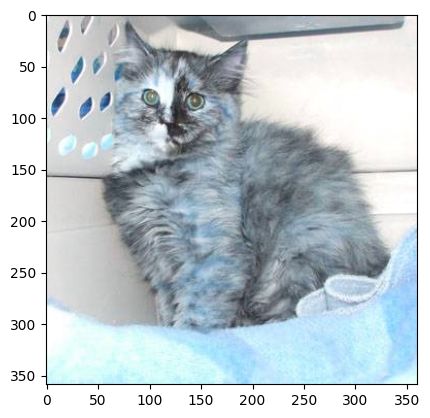

In [27]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("/content/cats-and-dogs-for-classification/cats_dogs/test/cats/cat.4005.jpg")
plt.imshow(image)
plt.show()

In [28]:
resized_image = tf.image.resize(image, IMAGE_SIZE)
scaled_image = resized_image / 255

In [29]:

scaled_image

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.9844966 , 0.98841816, 0.980575  ],
        [0.87435615, 0.8782777 , 0.8704346 ],
        [0.86140376, 0.86532533, 0.8574822 ],
        ...,
        [0.99798226, 0.9802543 , 0.9684896 ],
        [0.99364275, 0.9742503 , 0.9624856 ],
        [0.9922593 , 0.97372854, 0.96196383]],

       [[0.97274625, 0.9766678 , 0.9688247 ],
        [0.86573654, 0.8696581 , 0.861815  ],
        [0.86810184, 0.8720234 , 0.86418027],
        ...,
        [0.969761  , 0.95431983, 0.9404718 ],
        [0.9650108 , 0.945403  , 0.9336383 ],
        [0.96282166, 0.9432138 , 0.9314491 ]],

       [[0.95718634, 0.96074027, 0.9532648 ],
        [0.87335515, 0.8772767 , 0.8694336 ],
        [0.86081785, 0.8647394 , 0.8568963 ],
        ...,
        [0.94710475, 0.9295803 , 0.9219822 ],
        [0.95232844, 0.9327206 , 0.9209559 ],
        [0.96214336, 0.9425355 , 0.9307708 ]],

       ...,

       [[0.80201536, 0.9562151 , 0.96616113],
        [0.82

In [30]:

np.expand_dims(scaled_image,0).shape

(1, 128, 128, 3)

In [31]:

y_hat=model.predict(np.expand_dims(scaled_image,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


In [32]:

y_hat

array([[0.6652211]], dtype=float32)

In [33]:
class_names

['cats', 'dogs']

In [34]:
if y_hat>0.5:
  print(class_names[1])
else:
  print(class_names[0])

dogs
